#Advanced ML-DL Course
##Exercise 1

Nir Dar  <br>
Ron Fasher  <br>
Sahar Machavy  <br>
Omri Shmueli 

##**Imports**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector as SFS
import datetime
import time

Initializing variables for report purposes:

In [41]:
excluded_features = []
created_features = []
adaboost_dur = 0
randomforest_dur = 0
ridgeregression_dur = 0

In [42]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20I/train.csv?raw=true')
test = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20I/test.csv?raw=true')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


# **Data Exploration**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
 9   pollution   8164 non-null   float64
 10  sunlight    8164 non-null   float64
 11  traffic     8164 non-null   float64
 12  count       8164 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 829.3+ KB


Figure out the datetime columns, how sparse the samples and how often we measure it.

In [44]:
df.sort_values(by=['datetime'])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
6560,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,10.820673,9.021,0.000000,40
3754,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,19.189498,9.021,0.004489,32
7767,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.133472,9.841,0.015615,1
7272,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.014335,9.841,0.000000,1
5381,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,0.096936,9.021,0.004489,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,19.956957,17.221,0.015615,334
467,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,212.578827,15.581,0.004489,569
4423,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,21.027171,15.581,0.015615,336
3307,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,37.737255,14.761,0.004489,241


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
pollution     0
sunlight      0
traffic       0
count         0
dtype: int64


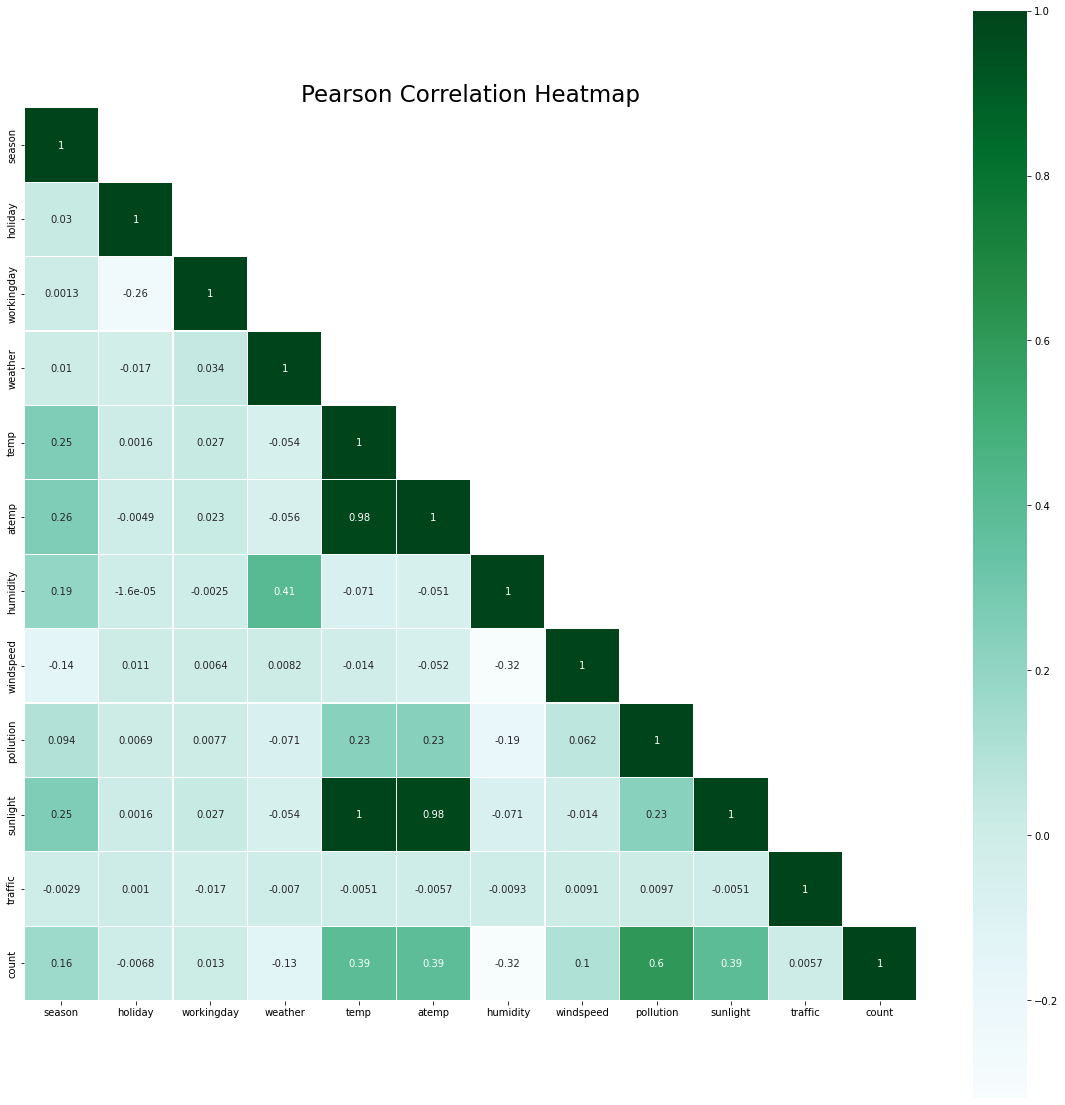

In [45]:
print(df.isna().sum())

correlations = df.corr()
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(20, 20))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(correlations, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask)

We should keep in mind the high correlation between bike rentals and pollution, but also with temp and season, weather and windspeed, which make sense overall

Organize columns properly if we need to categorize them

In [46]:
df['weather'].replace({1:"Clear", 2:"Cloudy", 3:"Rainy", 4:"Heavy_Rain"}, inplace=True)
df['season'].replace({1:"Winter", 2:"Spring", 3:"Summer", 4:"Fall"}, inplace=True)

Histogram of all features for a better understanding about how they behave

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5911619550>,
      dtype=object)

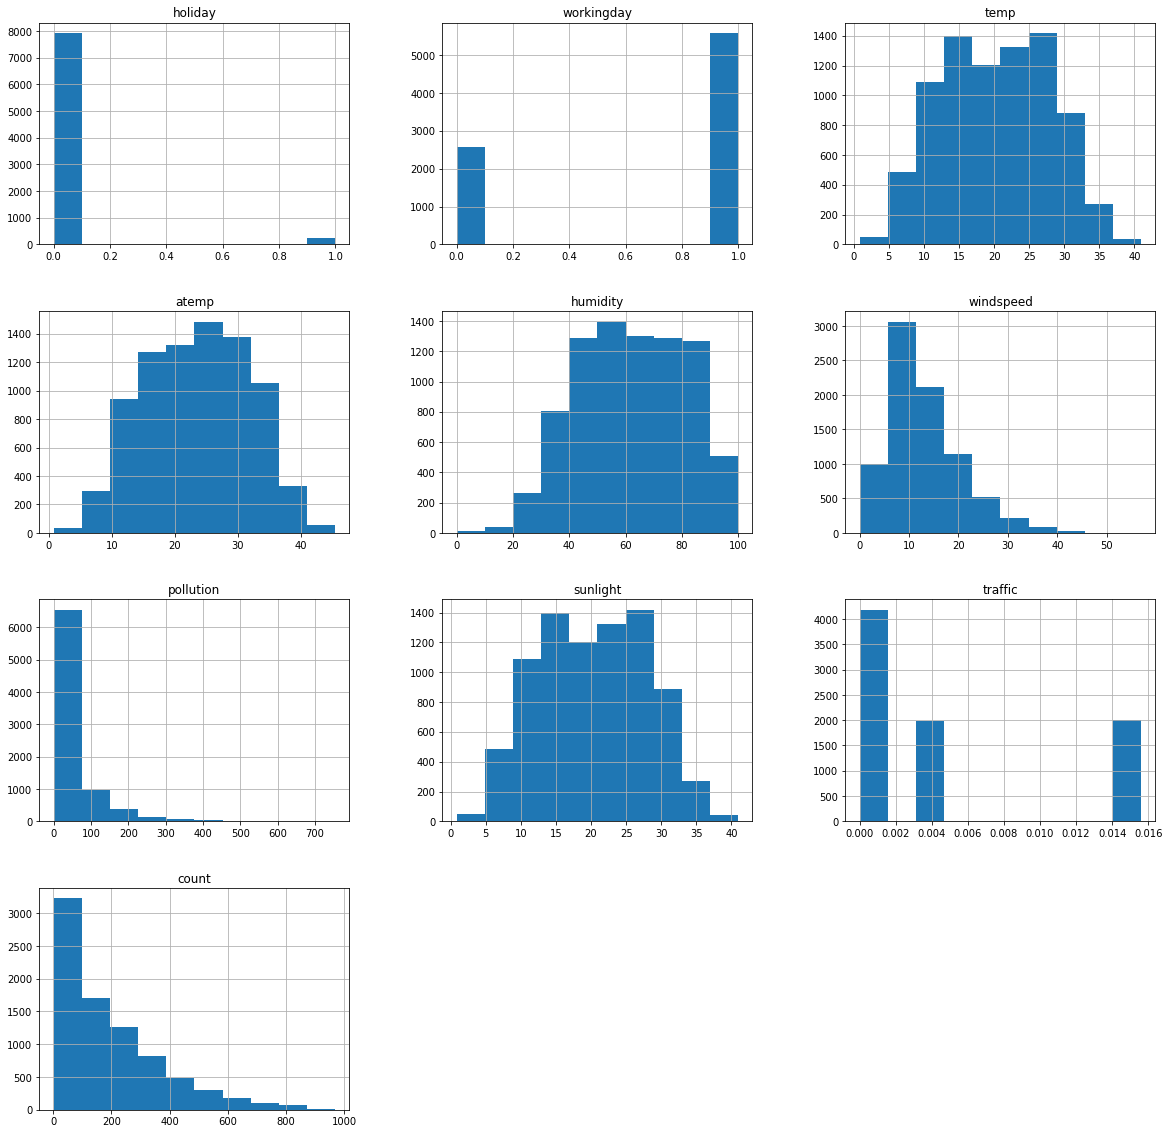

In [47]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
df.hist(figsize=(20,20))

In [48]:
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,0.029397,0.683244,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986,191.339784
std,0.168928,0.465240,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319,181.143178
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000,41.000000
50%,0.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242,145.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489,285.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615,970.000000


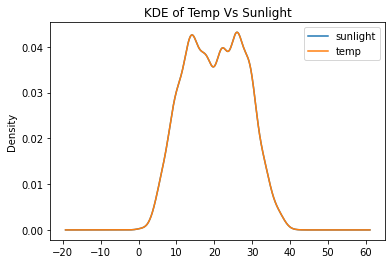

In [49]:
df[['sunlight','temp']].plot(kind='kde')
plt.title('KDE of Temp Vs Sunlight')
plt.show()

Temperature and sunlight overrule each other as suspected from correlation and the distribution seen from describe method

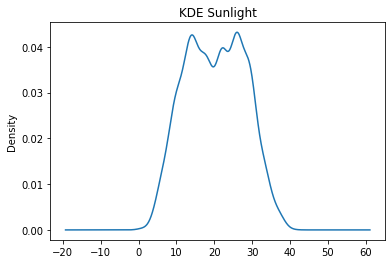

In [50]:
df['sunlight'].plot(kind='kde')
plt.title('KDE Sunlight')
plt.show()

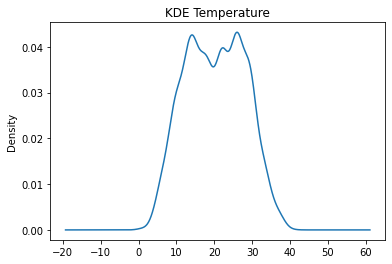

In [51]:
df['temp'].plot(kind='kde')
plt.title('KDE Temperature')
plt.show()

It is clear that *temp* and *sunlight* are very similar, we will remember to exclude one of them when manipulating features.

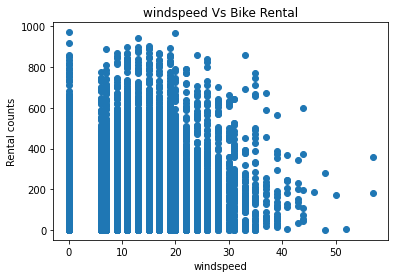

In [52]:
plt.scatter(df['windspeed'], df['count'])
plt.title("windspeed Vs Bike Rental")
plt.xlabel("windspeed")
plt.ylabel("Rental counts")
plt.show()

Decrease in bike rental as the windspeed goes up


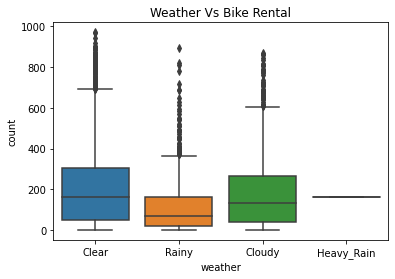

In [53]:
sns.boxplot(x='weather', y="count",data = df)
plt.title("Weather Vs Bike Rental")
plt.show()

Text(0, 0.5, 'Rental counts')

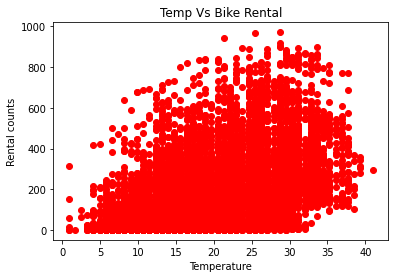

In [54]:
plt.scatter(df['temp'], df['count'], color = 'red')
plt.title("Temp Vs Bike Rental")
plt.xlabel("Temperature")
plt.ylabel("Rental counts")

Bike rental increases with temperature up to a point (~30 degrees) where it start to decline

We've seen higt correlation between pollution and bike rentals but we suspect it has no real cause. 

Text(0.5, 1.0, 'Pollution')

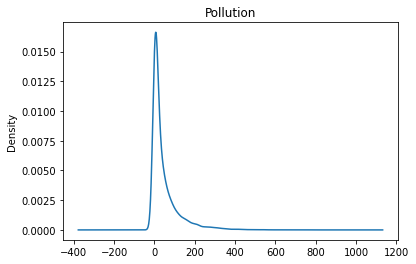

In [55]:
df['pollution'].plot(kind='kde')
plt.title('Pollution')

In [56]:
print("The percent of pollution values that is smaller than 100:")
print("{:.3f}".format((len(df[df['pollution'] < 100 ]) / len(df))))

The percent of pollution values that is smaller than 100:
0.856


Text(0.5, 1.0, 'Bike Rentals')

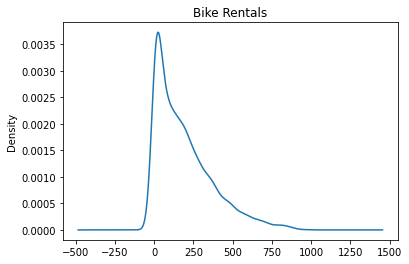

In [57]:
df['count'].plot(kind='kde')
plt.title('Bike Rentals')

The mean of pollution is 47 and the median is 17. Most of the values are small just like how count values behaves. Probably the reason of the similarity and the high correlation is due to the fact that both features behave naturally in a similar way.

Text(0, 0.5, 'Rental counts')

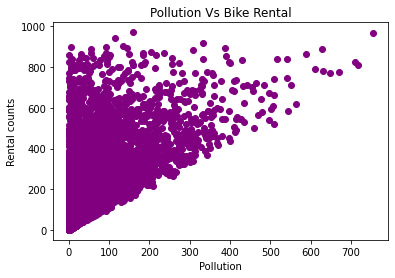

In [58]:
plt.scatter(x=df['pollution'],y=df['count'], color = 'purple')
plt.title("Pollution Vs Bike Rental")
plt.xlabel("Pollution")
plt.ylabel("Rental counts")

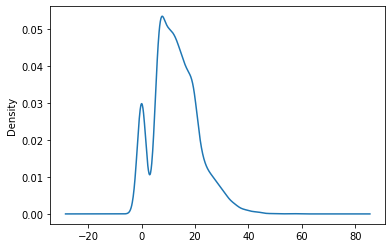

In [59]:
df['windspeed'].plot(kind='kde',bw_method=0.2)

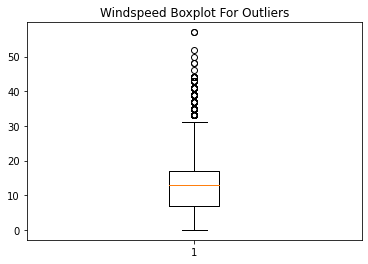

Proportion of samples above the upper whisker
0.021435570798628123


In [60]:
windSpeed_prob = plt.boxplot('windspeed',data=df)
whiskers = [item.get_ydata()[1] for item in windSpeed_prob['whiskers']]
plt.title("Windspeed Boxplot For Outliers")
plt.show()
print("Proportion of samples above the upper whisker")
print(len(df[df['windspeed'] > whiskers[1]])/len(df))

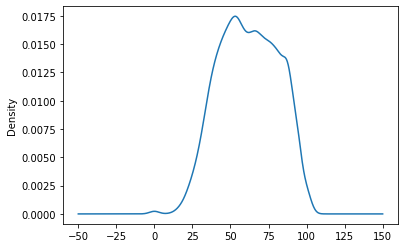

In [61]:
df['humidity'].plot(kind='kde')

In [62]:
df['traffic'].value_counts()

0.000000    2090
0.000242    2088
0.015615    2005
0.004489    1981
Name: traffic, dtype: int64

# **Feature Manipulation**

The *datetime* column can be parsed using a specific function, so that we can use specific information from that column.

In [63]:
df['datetime'] = pd.to_datetime(df['datetime'])

Earlier we saw that *temp* and *sunlight* are similar, so we will get rid of sunlight.

In [64]:
excluded_features.append('sunlight')
df.drop(['sunlight'],inplace= True,axis=1)

We create new variables that could help up using the *datetime* format.

In [65]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday
created_features.append('year')
created_features.append('month')
created_features.append('hour')
created_features.append('weekday')

We also thought about looking into transforming numerical values to the second power to amplify the effect of higher values, since those might explain certain behaviours.

In [66]:
df['windspeed_sq'] = df['windspeed']**2
df['pollution_sq'] = df['pollution']**2
created_features.append('windspeed_sq')
created_features.append('pollution_sq')

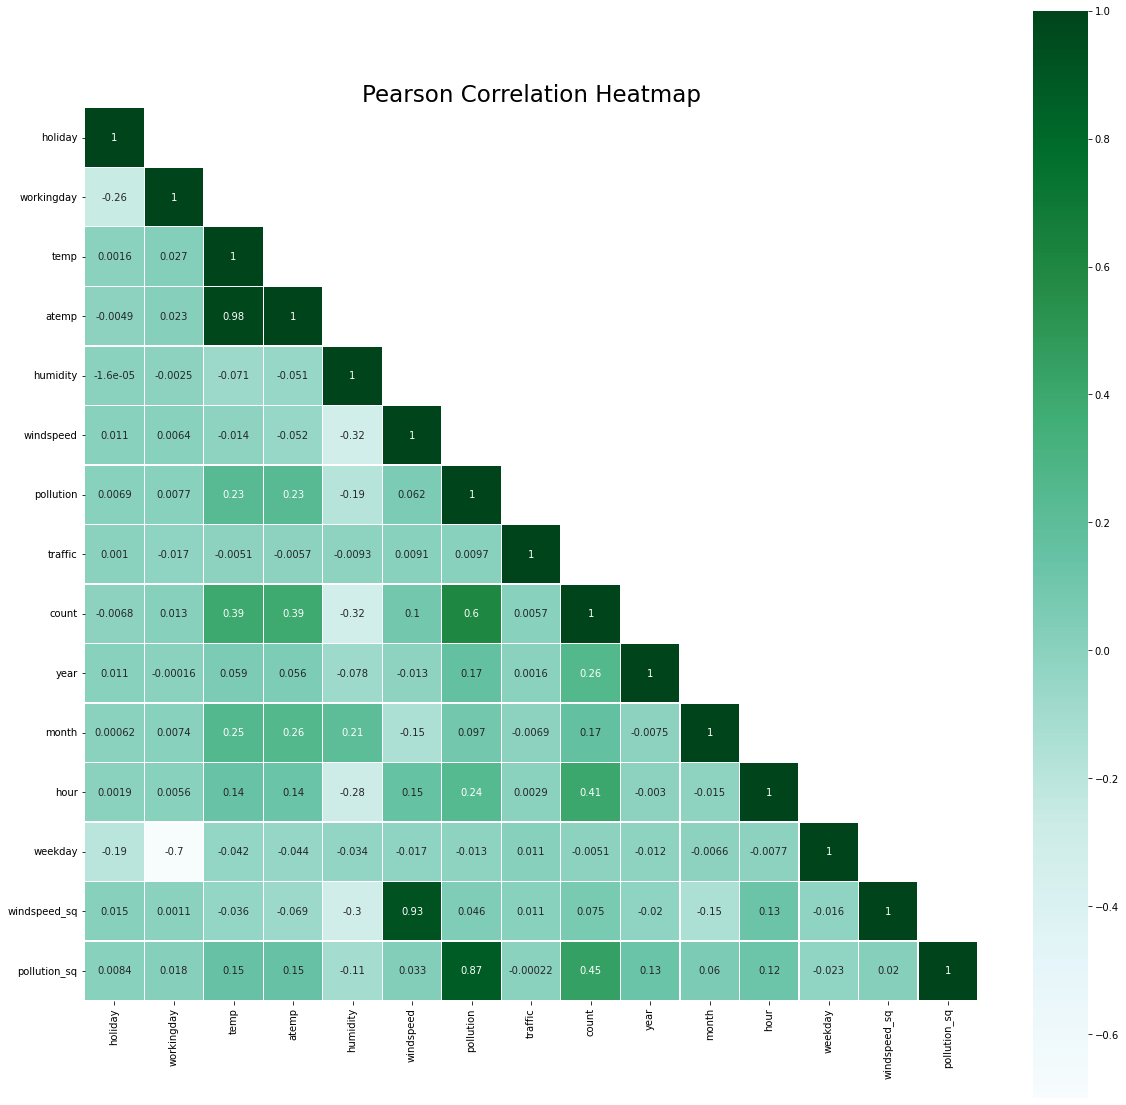

In [67]:
correlations = df.corr()
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(20, 20))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(correlations, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask)

Encoding categorical variables with "one-hot".

In [68]:
df = pd.get_dummies(df, columns=["weather","season",'weekday', 'month', 'hour'])

Discarding of *datetime* since we extracted our wanted features.

In [69]:
excluded_features.append('datetime')
df.drop(['datetime'],inplace= True,axis=1)

In [70]:
df.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'pollution', 'traffic', 'count', 'year', 'windspeed_sq', 'pollution_sq',
       'weather_Clear', 'weather_Cloudy', 'weather_Heavy_Rain',
       'weather_Rainy', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23'],
      dtype='object')

In [71]:
X = df.drop(['count'], axis=1)
Y = df[['count']]
X, Y

(      holiday  workingday   temp   atemp  humidity  windspeed  pollution  \
 0           0           1  28.70  32.575        65    12.9980   5.354100   
 1           0           1  22.96  26.515        52    22.0028  85.425233   
 2           0           1  12.30  15.910        61     6.0032   2.040899   
 3           0           0  23.78  27.275        60     8.9981  26.682772   
 4           0           1   8.20   9.850        93    12.9980   5.851754   
 ...       ...         ...    ...     ...       ...        ...        ...   
 8159        0           0   6.56   8.335        47    11.0014  14.953355   
 8160        0           0  11.48  12.880        61    19.0012   7.977025   
 8161        0           0  11.48  13.635        48    16.9979   6.916512   
 8162        0           0  15.58  19.695        17    35.0008   0.095445   
 8163        0           1  22.14  25.760        88    12.9980  81.965417   
 
        traffic  year  windspeed_sq  ...  hour_14  hour_15  hour_16  hour_

# **Defining Models**

Each model is due to run with a grid search cross-validation of 3 with the appropriate hyperparameters.

In [72]:
models = {'Random forest': None,
          'Ada boost': None,
          'Ridge regression ': None}

Random Forest

In [73]:
def run_random_forest(x_train, y_train):
  start = time.time()
  rf = RandomForestRegressor(n_estimators=1000, random_state=42)
  tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'max_features': ['sqrt', 1/3],
                                      'max_depth':[15,20],
                                      'min_samples_leaf':[2,4,6]},
                          scoring='neg_root_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_rf.fit(x_train, y_train)
  end = time.time()
  return tuned_rf, end-start

Ada Boost

In [74]:
def run_ada_boost(x_train, y_train):
  start = time.time()
  ab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20), n_estimators=1000, random_state=42) 
  tuned_ab = GridSearchCV(estimator=ab, 
                          param_grid={'learning_rate': [0.1,0.5,1],
                                      'loss':['square','linear'] },
                          scoring='neg_root_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_ab.fit(x_train, y_train)
  end = time.time()
  return tuned_ab, end-start

Ridge Regression

In [75]:
def run_ridge_regression(x_train, y_train):
  start = time.time()
  rr = Ridge()
  tuned_rr = GridSearchCV(estimator=rr, 
                          param_grid={'alpha': [0.1,1,2]},
                          scoring='neg_root_mean_squared_error',
                          cv=3, 
                          verbose=3)
  tuned_rr.fit(x_train, np.ravel(y_train))
  end = time.time()
  return tuned_rr, end-start

Run all models

In [76]:
  def run_all_models(x, y):
    models_dict = {}
    models_dict['Random forest'] = run_random_forest(x, y)
    models_dict['Ada boost'] = run_ada_boost(x, y)
    models_dict['Ridge regression'] = run_ridge_regression(x, y)
    return models_dict

In [77]:
models = run_all_models(X, Y.values.ravel())


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=-88.129 total time=   7.4s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=-88.541 total time=   8.8s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=-90.626 total time=   7.4s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=-91.434 total time=   6.8s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=-92.888 total time=   7.5s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=-93.939 total time=   6.6s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=6;, score=-94.675 total time=   6.2s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=6;, score=-95.997 total time=   6.3s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=6;, score=-96.729 total time=   6.4s
[CV 1/3] END max_depth=15, max_features

In [78]:
cv_scores = {}
cv_scores['Random forest'] = models['Random forest'][0].best_score_
randomforest_dur += models['Random forest'][1]
cv_scores['Ada boost'] = models['Ada boost'][0].best_score_
adaboost_dur +=  models['Ada boost'][1]
cv_scores['Ridge regression'] = models['Ridge regression'][0].best_score_
ridgeregression_dur += models['Ridge regression'][1]
cv_scores

{'Random forest': -82.35420718038563,
 'Ada boost': -59.96118621297512,
 'Ridge regression': -93.00706075880503}

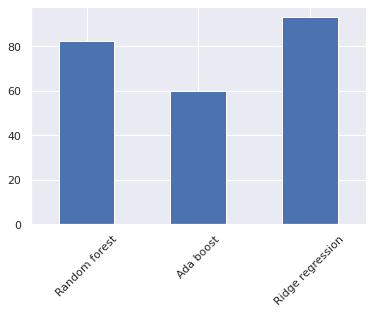

In [79]:
sns.set()
cv_scores_df = -pd.DataFrame.from_dict(cv_scores, orient='index')
cv_scores_df.plot.bar(rot=45, legend=False)

In [80]:
models['Random forest'][0].best_params_


{'max_depth': 20, 'max_features': 0.3333333333333333, 'min_samples_leaf': 2}

In [81]:
models['Ada boost'][0].best_params_


{'learning_rate': 1, 'loss': 'square'}

In [82]:
models['Ridge regression'][0].best_params_

{'alpha': 2}

In [83]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'][0].best_estimator_
trained_models_dict['Ada boost'] = models['Ada boost'][0].best_estimator_
trained_models_dict['Ridge regression'] = models['Ridge regression'][0].best_estimator_
trained_models_dict

{'Random forest': RandomForestRegressor(max_depth=20, max_features=0.3333333333333333,
                       min_samples_leaf=2, n_estimators=1000, random_state=42),
 'Ada boost': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                   learning_rate=1, loss='square', n_estimators=1000,
                   random_state=42),
 'Ridge regression': Ridge(alpha=2)}

Feature Importance

In [84]:
feature_importance_dict = {}


Tree based methods

In [85]:
def find_tree_feature_importance(model, columns):
  importance = model.feature_importances_
  importance *= 100 / np.max(importance)  # Normalize
  importance = pd.DataFrame(importance, index=columns, columns=["Importance"])
  importance = importance.sort_values(by=['Importance'], ascending=False)
  return importance

In [86]:
feature_importance_dict['Random forest'] = find_tree_feature_importance(trained_models_dict['Random forest'], X.columns)
feature_importance_dict['Ada boost'] = find_tree_feature_importance(trained_models_dict['Ada boost'], X.columns)

Ridge regression method


In [87]:
def find_normalized_lr_feature_importance(model, x_train):
  coefficients = {x_train.columns[i]: np.abs(model.coef_[i]) for i in range(len(x_train.columns))}
  coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Importance'])
  coefficients_df['Importance'] *=  x_train.std()
  coefficients_df['Importance'] *= 100 / coefficients_df['Importance'].max()
  importance = coefficients_df.sort_values(by=['Importance'], ascending=False)
  return importance

In [88]:
feature_importance_dict['Ridge regression'] = find_normalized_lr_feature_importance(trained_models_dict['Ridge regression'], X)


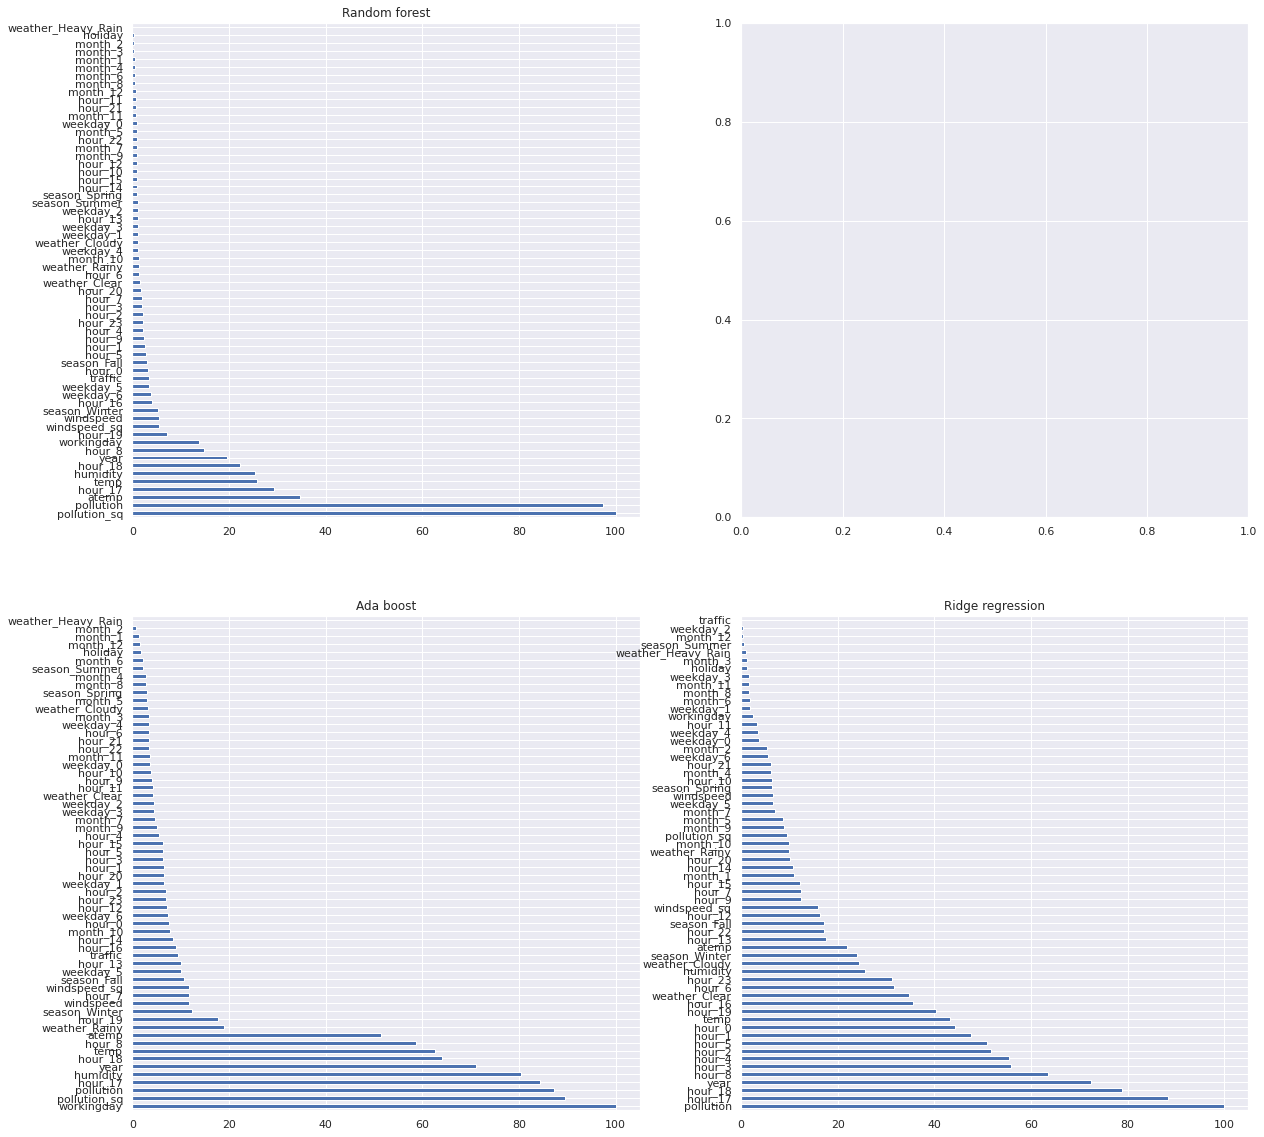

In [89]:
sns.set()

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
feature_importance_dict['Random forest'].plot(kind='barh', ax=axes[0, 0], legend=False, title='Random forest')
feature_importance_dict['Ada boost'].plot(kind='barh', ax=axes[1, 0], legend=False, title='Ada boost')
feature_importance_dict['Ridge regression'].plot(kind='barh', ax=axes[1, 1], legend=False, title='Ridge regression')

It looks like AdaBoost performs the best out of the three. Some of the features it uses are less crucial than the others, so in order to reduce dimentionality we will take the 20 most important features and rerun the models. 

In [90]:
feat = feature_importance_dict['Ada boost'].iloc[0:20,0].index
feat

Index(['workingday', 'pollution_sq', 'pollution', 'hour_17', 'humidity',
       'year', 'hour_18', 'temp', 'hour_8', 'atemp', 'weather_Rainy',
       'hour_19', 'season_Winter', 'windspeed', 'hour_7', 'windspeed_sq',
       'season_Fall', 'weekday_5', 'hour_13', 'traffic'],
      dtype='object')

In [91]:
excluded_features.extend(list(feature_importance_dict['Ada boost'].iloc[20:,0].index))

In [92]:
models = run_all_models(X[feat], Y.values.ravel())


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=-93.267 total time=   8.8s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=-93.624 total time=   8.3s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=-96.611 total time=   7.7s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=-96.868 total time=   6.9s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=-97.837 total time=   7.0s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=-100.466 total time=   8.4s
[CV 1/3] END max_depth=15, max_features=sqrt, min_samples_leaf=6;, score=-99.556 total time=   6.5s
[CV 2/3] END max_depth=15, max_features=sqrt, min_samples_leaf=6;, score=-100.458 total time=   6.5s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=6;, score=-102.840 total time=   6.5s
[CV 1/3] END max_depth=15, max_featu

In [93]:
cv_scores = {}
cv_scores['Random forest'] = models['Random forest'][0].best_score_
randomforest_dur += models['Random forest'][1]
cv_scores['Ada boost'] = models['Ada boost'][0].best_score_
adaboost_dur +=  models['Ada boost'][1]
cv_scores['Ridge regression'] = models['Ridge regression'][0].best_score_
ridgeregression_dur += models['Ridge regression'][1]
cv_scores

{'Random forest': -93.65974162116987,
 'Ada boost': -85.04623706005623,
 'Ridge regression': -106.84063215509066}

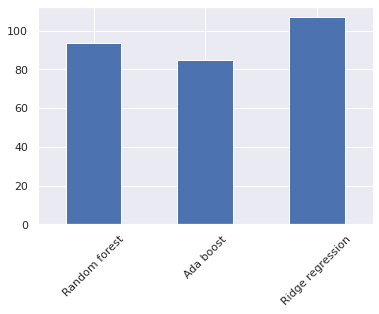

In [94]:
sns.set()
cv_scores_df = -pd.DataFrame.from_dict(cv_scores, orient='index')
cv_scores_df.plot.bar(rot=45, legend=False)

In [95]:
models['Random forest'][0].best_params_


{'max_depth': 20, 'max_features': 0.3333333333333333, 'min_samples_leaf': 2}

In [96]:
models['Ada boost'][0].best_params_


{'learning_rate': 1, 'loss': 'square'}

In [97]:
models['Ridge regression'][0].best_params_

{'alpha': 2}

In [98]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'][0].best_estimator_
trained_models_dict['Ada boost'] = models['Ada boost'][0].best_estimator_
trained_models_dict['Ridge regression'] = models['Ridge regression'][0].best_estimator_
trained_models_dict

{'Random forest': RandomForestRegressor(max_depth=20, max_features=0.3333333333333333,
                       min_samples_leaf=2, n_estimators=1000, random_state=42),
 'Ada boost': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                   learning_rate=1, loss='square', n_estimators=1000,
                   random_state=42),
 'Ridge regression': Ridge(alpha=2)}

Feature Importance

In [99]:
feature_importance_dict = {}


In [100]:
feature_importance_dict['Random forest'] = find_tree_feature_importance(trained_models_dict['Random forest'], X[feat].columns)
feature_importance_dict['Ada boost'] = find_tree_feature_importance(trained_models_dict['Ada boost'], X[feat].columns)

In [101]:
feature_importance_dict['Ridge regression'] = find_normalized_lr_feature_importance(trained_models_dict['Ridge regression'], X[feat])


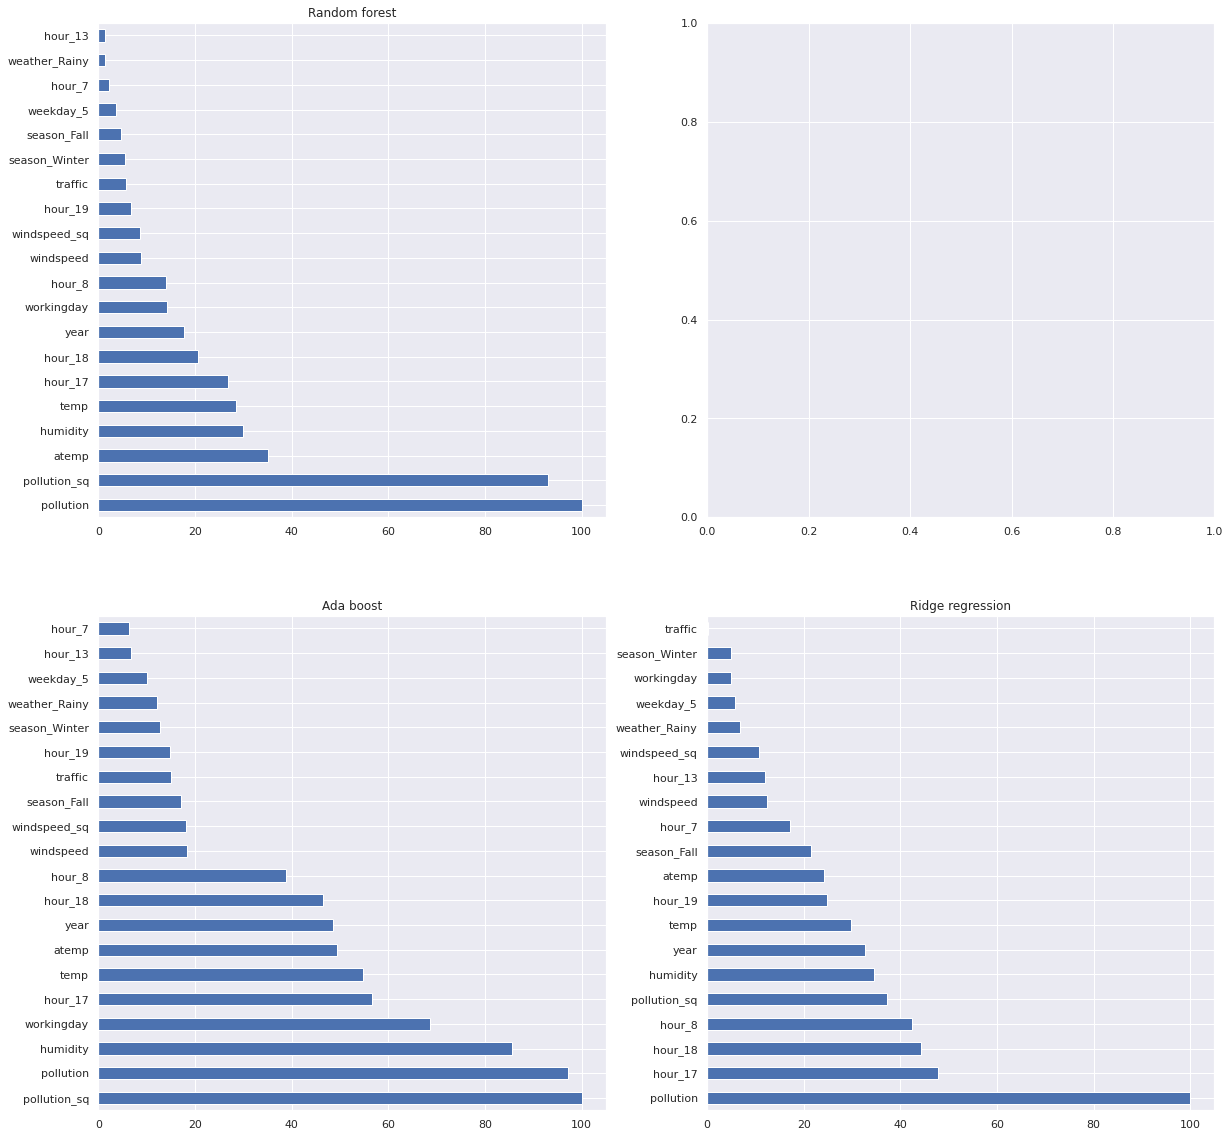

In [102]:
sns.set()

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
feature_importance_dict['Random forest'].plot(kind='barh', ax=axes[0, 0], legend=False, title='Random forest')
feature_importance_dict['Ada boost'].plot(kind='barh', ax=axes[1, 0], legend=False, title='Ada boost')
feature_importance_dict['Ridge regression'].plot(kind='barh', ax=axes[1, 1], legend=False, title='Ridge regression')

**Handling the test set**

In [103]:
from sklearn.metrics import mean_squared_error

def evaluate_single_model(x, y, model):
  y_pred = model.predict(x)
  return np.sqrt(mean_squared_error(y, y_pred))

In [104]:
def evaluate_all_models(x, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x, y, v)
  return test_set_scores

Applying the same changes to the test set:

In [105]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [106]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

In [107]:
test['windspeed_sq'] = test['windspeed']**2
test['pollution_sq'] = test['pollution']**2

In [108]:
test['weather'].replace({1:"Clear", 2:"Cloudy", 3:"Rainy", 4:"Heavy_Rain"}, inplace=True)
test['season'].replace({1:"Winter", 2:"Spring", 3:"Summer", 4:"Fall"}, inplace=True)

In [109]:
test = pd.get_dummies(test, columns=["weather","season",'weekday', 'month', 'hour'])

In [110]:
test.drop(['datetime'],inplace= True,axis=1)
test.drop(['sunlight'],inplace= True,axis=1)

In [111]:
X_test = df.drop(['count'], axis=1)
Y_test = df[['count']]
X_test, Y_test

(      holiday  workingday   temp   atemp  humidity  windspeed  pollution  \
 0           0           1  28.70  32.575        65    12.9980   5.354100   
 1           0           1  22.96  26.515        52    22.0028  85.425233   
 2           0           1  12.30  15.910        61     6.0032   2.040899   
 3           0           0  23.78  27.275        60     8.9981  26.682772   
 4           0           1   8.20   9.850        93    12.9980   5.851754   
 ...       ...         ...    ...     ...       ...        ...        ...   
 8159        0           0   6.56   8.335        47    11.0014  14.953355   
 8160        0           0  11.48  12.880        61    19.0012   7.977025   
 8161        0           0  11.48  13.635        48    16.9979   6.916512   
 8162        0           0  15.58  19.695        17    35.0008   0.095445   
 8163        0           1  22.14  25.760        88    12.9980  81.965417   
 
        traffic  year  windspeed_sq  ...  hour_14  hour_15  hour_16  hour_

In [112]:
test_set_scores = evaluate_all_models(X_test[feat], Y_test, trained_models_dict)
test_set_scores

{'Random forest': 51.01909444532902,
 'Ada boost': 18.19316187553811,
 'Ridge regression': 106.41557713862497}

In [113]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Random forest': [93.65974162116987, 51.01909444532902],
 'Ada boost': [85.04623706005623, 18.19316187553811],
 'Ridge regression': [106.84063215509066, 106.41557713862497]}

In [114]:
scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score', 'Test set score'])
scores_df

,CV score,Test set score
Random forest,93.659742,51.019094
Ada boost,85.046237,18.193162
Ridge regression,106.840632,106.415577


Preparing the CSV file:

In [115]:
results = {'model': ['Random Forest', 'AdaBoost', 'Ridge Regression'],
           'Score (RMSE)': scores_df['Test set score'],
           'Hyperparams used': [[models['Random forest'][0].best_params_], [models['Ada boost'][0].best_params_], [models['Ridge regression'][0].best_params_]],
           'Features dropped': [excluded_features, excluded_features, excluded_features],
           'New features created': [created_features, created_features, created_features],
           'Runtime trainining + inference (seconds)': [randomforest_dur, adaboost_dur, ridgeregression_dur],
           'Hardware used (GPU/CPU/TPU)': ['CPU', 'CPU', 'CPU'],
           'Explainability (top 3 features)': [list(feature_importance_dict['Random forest'][0:3].index), list(feature_importance_dict['Ada boost'][0:3].index), list(feature_importance_dict['Ridge regression'][0:3].index)]
           }

df = pd.DataFrame(results)
df

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
Random forest,Random Forest,51.019094,"[{'max_depth': 20, 'max_features': 0.333333333...","[sunlight, datetime, hour_16, hour_14, month_1...","[year, month, hour, weekday, windspeed_sq, pol...",744.909501,CPU,"[pollution, pollution_sq, atemp]"
Ada boost,AdaBoost,18.193162,"[{'learning_rate': 1, 'loss': 'square'}]","[sunlight, datetime, hour_16, hour_14, month_1...","[year, month, hour, weekday, windspeed_sq, pol...",2112.695246,CPU,"[pollution_sq, pollution, humidity]"
Ridge regression,Ridge Regression,106.415577,[{'alpha': 2}],"[sunlight, datetime, hour_16, hour_14, month_1...","[year, month, hour, weekday, windspeed_sq, pol...",0.360367,CPU,"[pollution, hour_17, hour_18]"


In [116]:
import os
df.to_csv(os.path.join(os.getcwd(), 'exercise1.csv'))
df.to_csv("/content/drive/My Drive/Colab Notebooks/exercise1.csv")